##THEORETICAL

1.What is unsupervised learning in the context of machine learning.


In [ ]:
'''Definition:
Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data without predefined outcomes.

Key Concepts:

No target/output variable.

The model tries to find hidden structures (e.g., clusters or associations).

Examples:

Clustering (e.g., K-Means, DBSCAN)

Dimensionality Reduction (e.g., PCA)

'''

2.How does K-Means clustering algorithm work.


In [ ]:
'''Working Steps:

Choose k clusters.

Initialize k centroids randomly.

Assign each data point to the nearest centroid (using Euclidean distance).

Recalculate centroids as the mean of assigned points.

Repeat steps 3–4 until convergence (centroids don't change significantly).

Goal: Minimize within-cluster variance (inertia).

'''

3.Explain the concept of a dendrogram in hierarchical clustering.


In [ ]:
'''Definition:
A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering.

Purpose:

Visualize how clusters are merged/split.

Help determine the optimal number of clusters by "cutting" the dendrogram at a specific height.'''

4.What is the main difference between K-Means and Hierarchical Clustering.


In [ ]:
'''K-Means is a partitional clustering algorithm, meaning it partitions the dataset into a fixed number of clusters (k), which must be defined before the algorithm begins. It assigns each data point to one of the k clusters based on proximity to the cluster's centroid.

In contrast, hierarchical clustering builds a hierarchy of clusters without needing to specify the number of clusters in advance. It follows either a bottom-up (agglomerative) or top-down (divisive) approach. The results are often visualized using a dendrogram, which helps in deciding the number of clusters after the algorithm is run.

Additionally, K-Means is generally more scalable and suitable for large datasets, whereas hierarchical clustering can be computationally intensive and better suited for smaller datasets.'''

5.What are the advantages of DBSCAN over K-Means.


In [ ]:
'''No need to specify k.

Handles noise/outliers.

Can detect clusters of arbitrary shape.

Works well with clusters of different densities.

'''

6.When would you use Silhouette Score in clustering.


In [ ]:
'''Use Case:
To evaluate how well each data point fits within its assigned cluster.

Range:

+1: Well-clustered.

0: On the border.

-1: Misclassified.

When to use:

To compare clustering performance across different k values or algorithms.'''

7.What are the limitations of Hierarchical Clustering.


In [ ]:
'''Computationally expensive (O(n²) or worse).

Not suitable for large datasets.

Irreversible (merging/splitting can't be undone).

Sensitive to noise and outliers.'''

8.Why is feature scaling important in clustering algorithms like K-Means.


In [ ]:
'''Reason:

K-Means uses Euclidean distance.

Features with larger scales dominate distance calculations.

Solution:

Apply standardization (Z-score) or normalization (Min-Max).'''

9.How does DBSCAN identify noise points.


In [ ]:
'''Criteria:

A point is labeled as noise if it’s:

Not a core point (doesn’t have enough neighbors within ε).

Not reachable from any core point.

'''

10.Define inertia in the context of K-Means.


In [ ]:
'''Inertia:

The sum of squared distances between each point and its assigned cluster centroid.

Lower inertia = better clustering (up to a point).'''

11.What is the elbow method in K-Means clustering.


In [ ]:
'''Concept:

Plot inertia vs. number of clusters (k).

Look for a “knee” or “elbow” point — the optimal k where adding more clusters yields diminishing returns.'''

12.Describe the concept of "density" in DBSCAN.


In [ ]:
'''Definition:

A region is dense if there are at least MinPts points within a distance ε (epsilon).

Types of Points:

Core: ≥ MinPts within ε.

Border: < MinPts but near a core point.

Noise: Neither core nor border.'''

13.Can hierarchical clustering be used on categorical data.


In [ ]:
'''Yes, but with a different approach:

Use distance metrics like Hamming or Jaccard.

Apply Gower distance for mixed data types.'''

14.What does a negative Silhouette Score indicate.


In [ ]:
'''The point is closer to a different cluster than its own.

Indicates poor clustering or incorrect assignment.'''


15.Explain the term "linkage criteria" in hierarchical clustering.


In [ ]:
'''Definition:

Determines how distances between clusters are calculated.

Types:

Single linkage: Minimum distance.

Complete linkage: Maximum distance.

Average linkage: Mean distance.

Ward’s method: Minimizes variance.'''

16.Why might K-Means clustering perform poorly on data with varying cluster sizes or densities.


In [ ]:
'''Assumes equal-sized, spherical clusters.

Sensitive to outliers and noise.

May merge small clusters or split large ones incorrectly.'''

17.What are the core parameters in DBSCAN, and how do they influence clustering.


In [ ]:
'''ε (epsilon): Radius for neighborhood.

Too small: Many noise points.

Too large: Merges distinct clusters.

MinPts: Minimum points to form a dense region.

Higher MinPts = stricter density requirement.'''

18.How does K-Means++ improve upon standard K-Means initialization.


In [ ]:
'''Improvement:

Selects initial centroids more strategically to be far apart.

Benefit:

Reduces chances of poor local minima.

Leads to better and more consistent clustering.'''

19.What is agglomerative clustering.


In [ ]:
'''Definition:

A bottom-up hierarchical clustering method.

Each point starts as its own cluster.

Clusters are iteratively merged based on distance until one cluster remains.'''

20.What makes Silhouette Score a better metric than just inertia for model evaluation?

In [ ]:
'''Inertia is a metric used in K-Means clustering that measures the compactness of clusters by calculating the sum of squared distances from each point to its assigned cluster centroid. While it is useful, inertia always decreases as the number of clusters increases, which can make it misleading. It does not account for how well-separated the clusters are from each other.

Silhouette Score, on the other hand, provides a more balanced evaluation. It measures both the cohesion (how close data points in the same cluster are) and the separation (how distinct a cluster is from others). It ranges from -1 to 1, where a higher value indicates better clustering. Because it considers both intra-cluster similarity and inter-cluster differences, Silhouette Score offers a more informative and interpretable metric, making it especially useful when comparing clustering results with different values of k or using different algorithms.'''

##PRACTICAL


21.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.


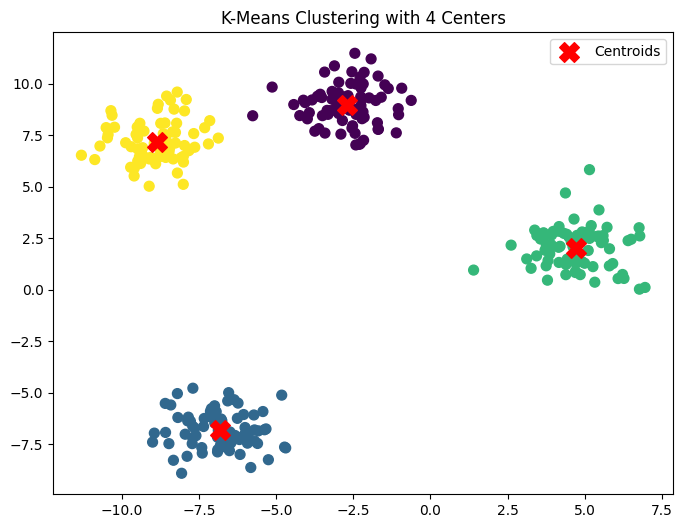

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with 4 Centers")
plt.legend()
plt.show()


22.Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.


In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
labels = agg_clust.fit_predict(X)

# Display first 10 predicted labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


23.Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.


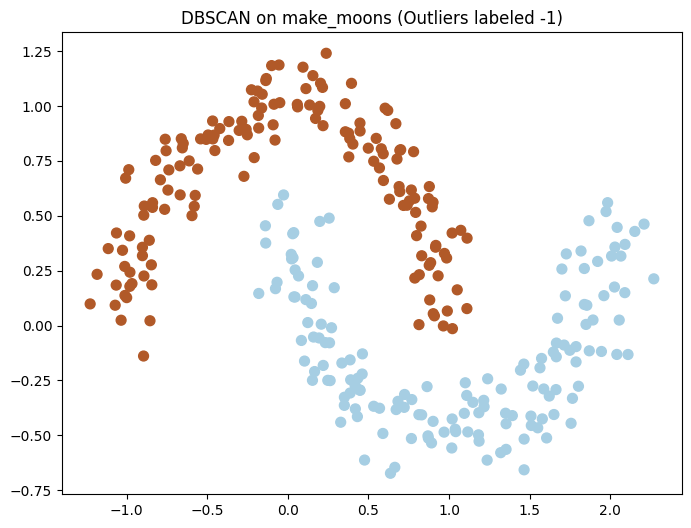

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', s=50)
plt.title("DBSCAN on make_moons (Outliers labeled -1)")
plt.show()


24.Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.


In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


25.Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.


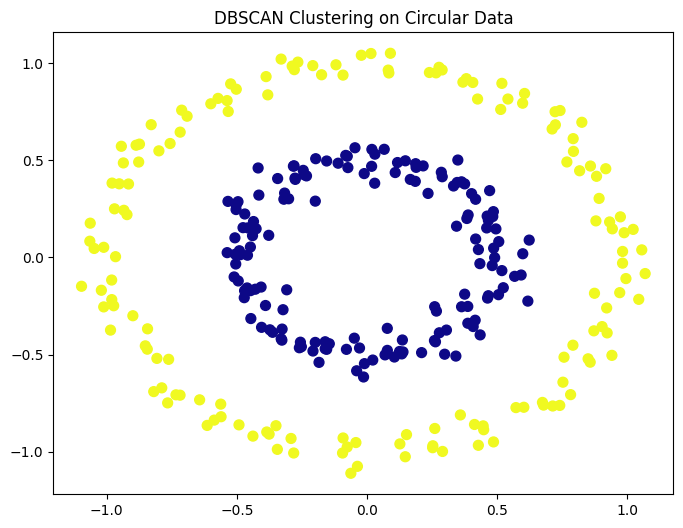

In [5]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering on Circular Data")
plt.show()


26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


27.Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.


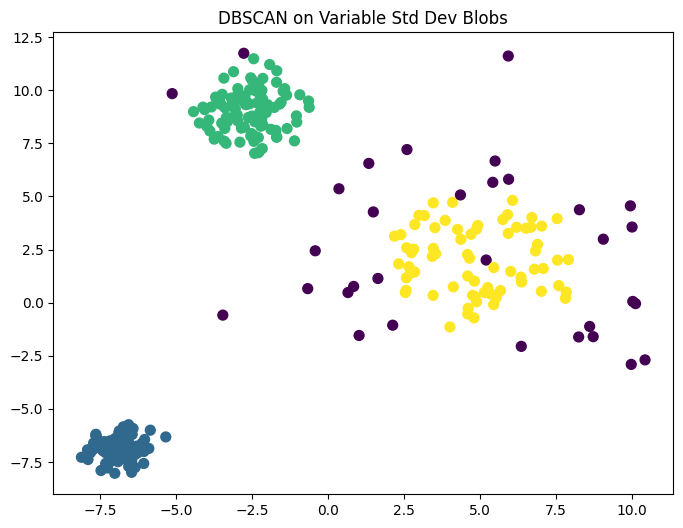

In [7]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN on Variable Std Dev Blobs")
plt.show()


28.Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.


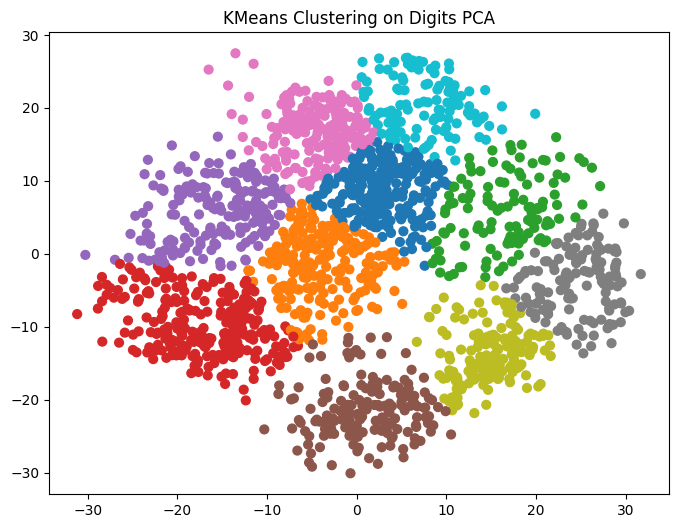

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=40)
plt.title("KMeans Clustering on Digits PCA")
plt.show()


29.Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.


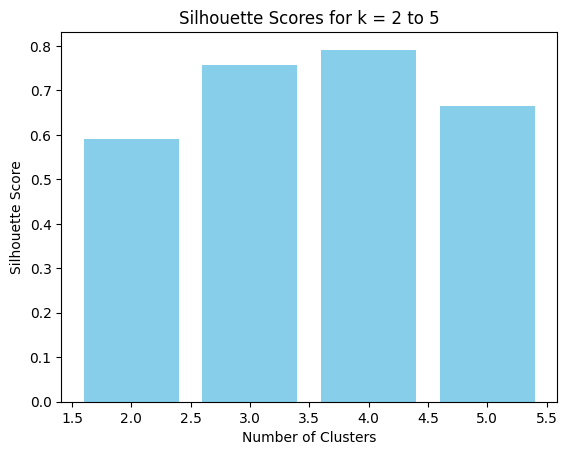

In [9]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.bar(range(2, 6), scores, color='skyblue')
plt.title("Silhouette Scores for k = 2 to 5")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


30.Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.


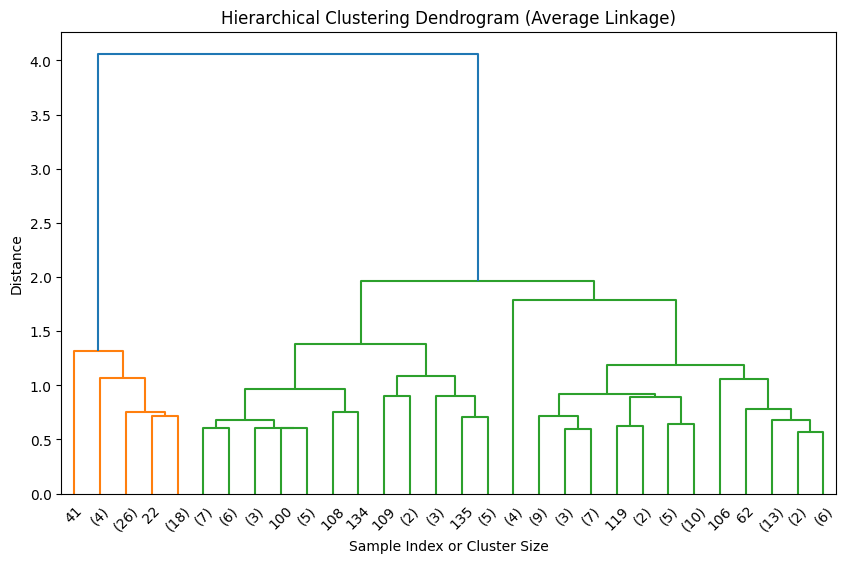

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
linked = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()


31.Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.


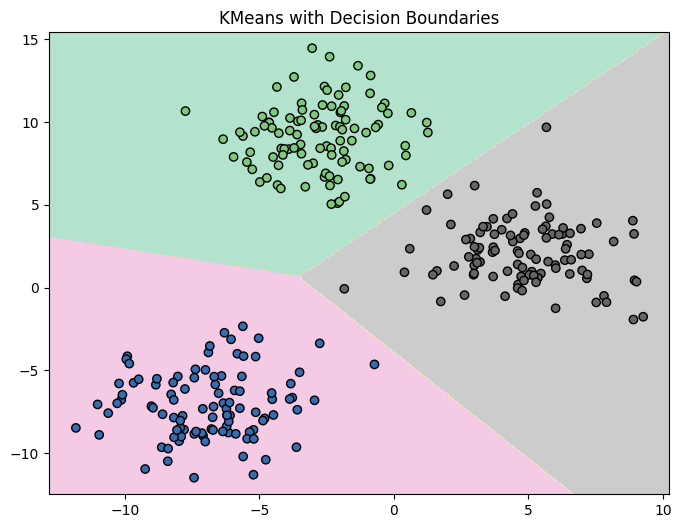

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Create decision boundaries
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Accent', edgecolors='k')
plt.title("KMeans with Decision Boundaries")
plt.show()


32.Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.


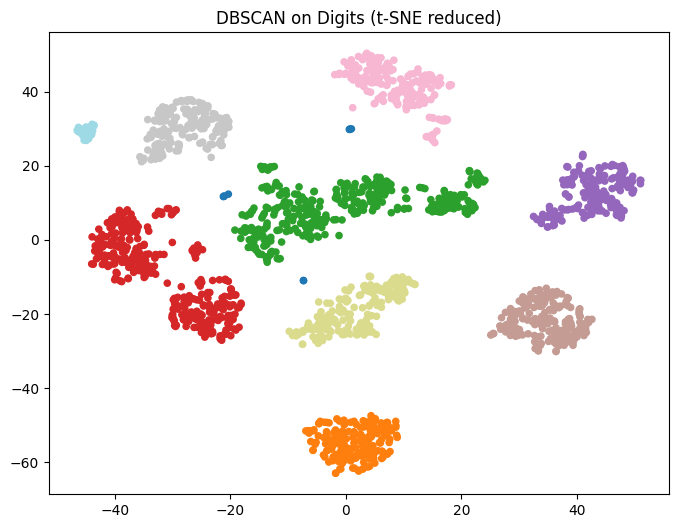

In [12]:
from sklearn.manifold import TSNE

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab20', s=20)
plt.title("DBSCAN on Digits (t-SNE reduced)")
plt.show()


33.Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.


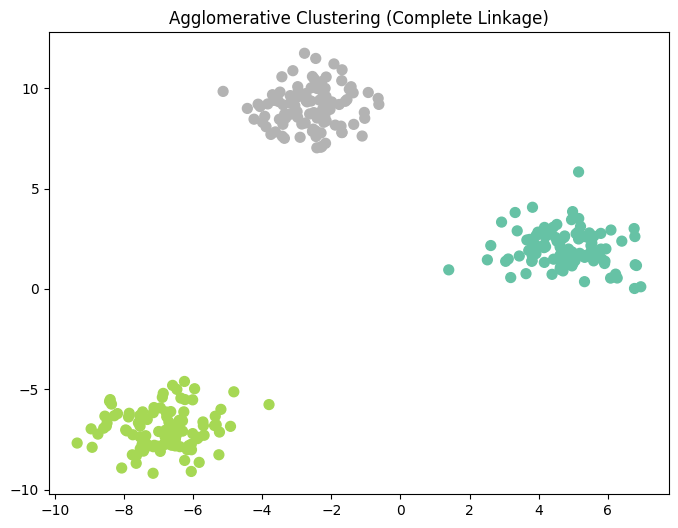

In [13]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


34.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.


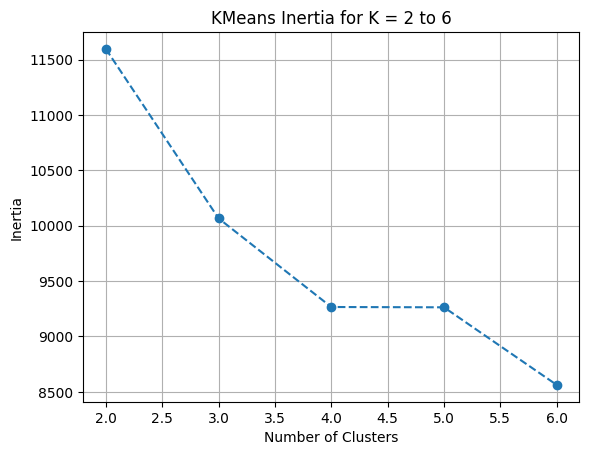

In [14]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o', linestyle='--')
plt.title("KMeans Inertia for K = 2 to 6")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


35.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.


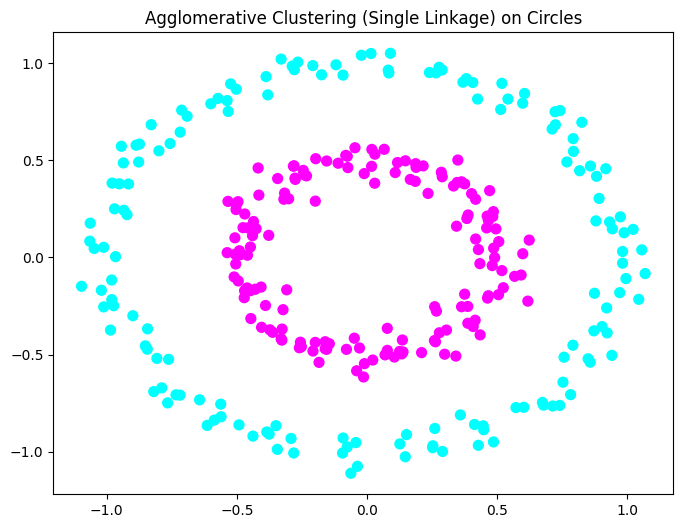

In [15]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool', s=50)
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


36.Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise.


In [16]:
data = load_wine()
X = StandardScaler().fit_transform(data.data)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


37.Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.


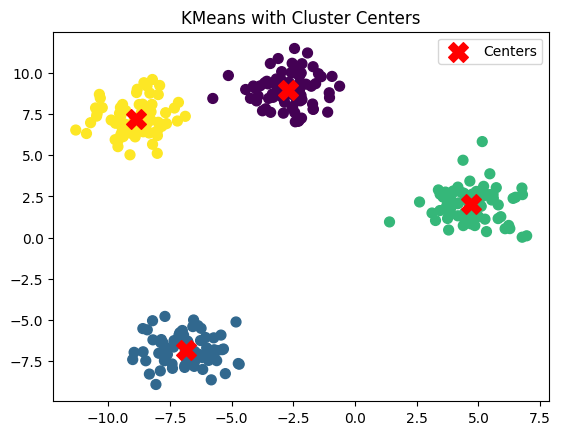

In [17]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.title("KMeans with Cluster Centers")
plt.show()


38.Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.


In [18]:
X = load_iris().data
X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of noise points: 4


39.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.


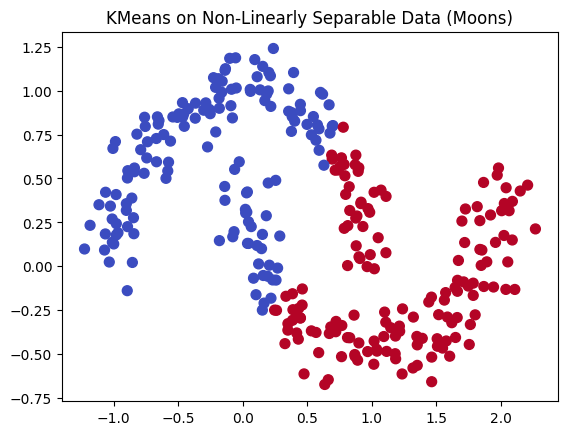

In [19]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', s=50)
plt.title("KMeans on Non-Linearly Separable Data (Moons)")
plt.show()


40.Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.


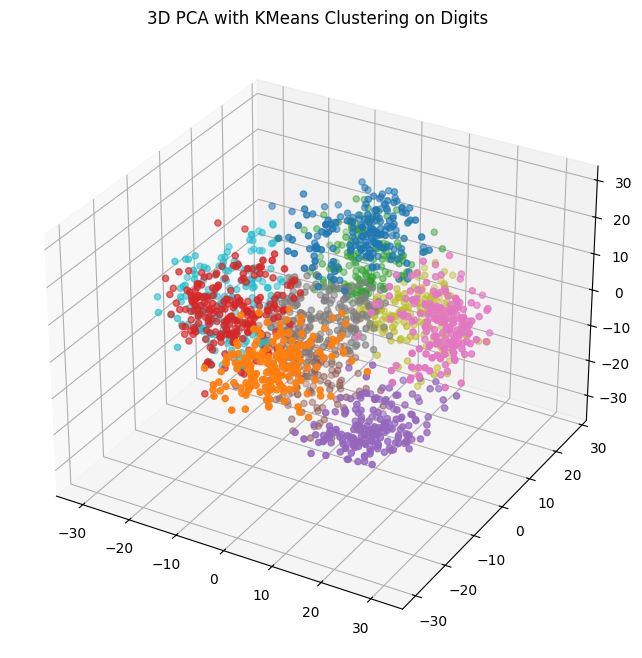

In [20]:
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X_pca = PCA(n_components=3).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab10', s=20)
ax.set_title("3D PCA with KMeans Clustering on Digits")
plt.show()


41.Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.


In [21]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)

print("Silhouette Score for 5 clusters:", score)


Silhouette Score for 5 clusters: 0.678738720085253


42.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.


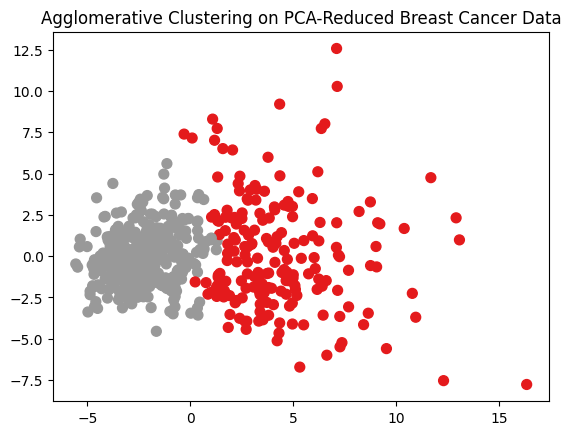

In [22]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering on PCA-Reduced Breast Cancer Data")
plt.show()


43.Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.


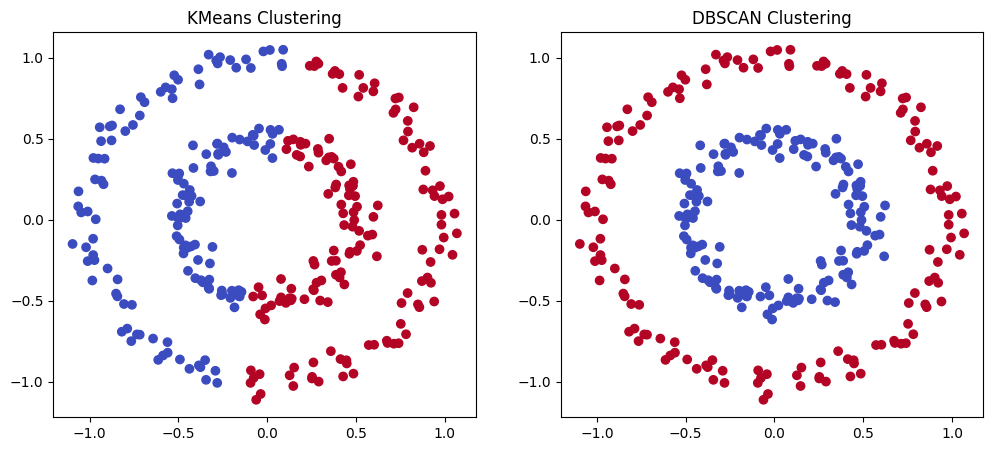

In [23]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm')
ax1.set_title("KMeans Clustering")

ax2.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='coolwarm')
ax2.set_title("DBSCAN Clustering")
plt.show()


44.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.


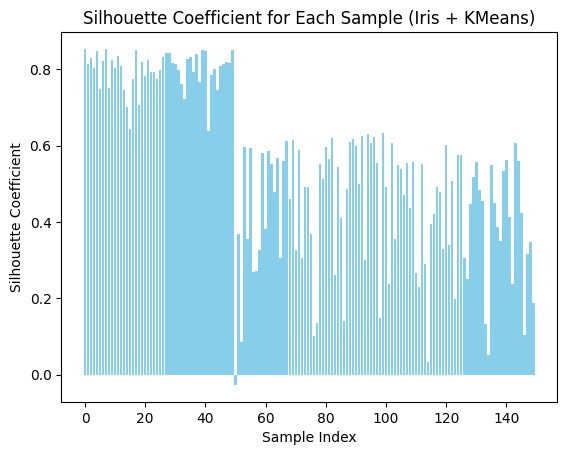

In [24]:
from sklearn.metrics import silhouette_samples

X = load_iris().data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
silhouette_vals = silhouette_samples(X, kmeans.labels_)

plt.bar(range(len(silhouette_vals)), silhouette_vals, color='skyblue')
plt.title("Silhouette Coefficient for Each Sample (Iris + KMeans)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()


45.Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.


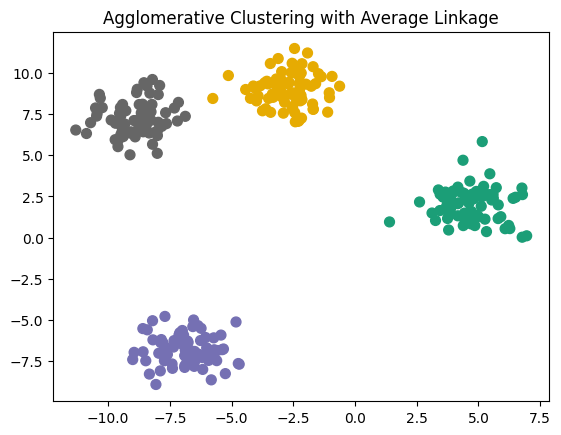

In [25]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Dark2', s=50)
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()


46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).


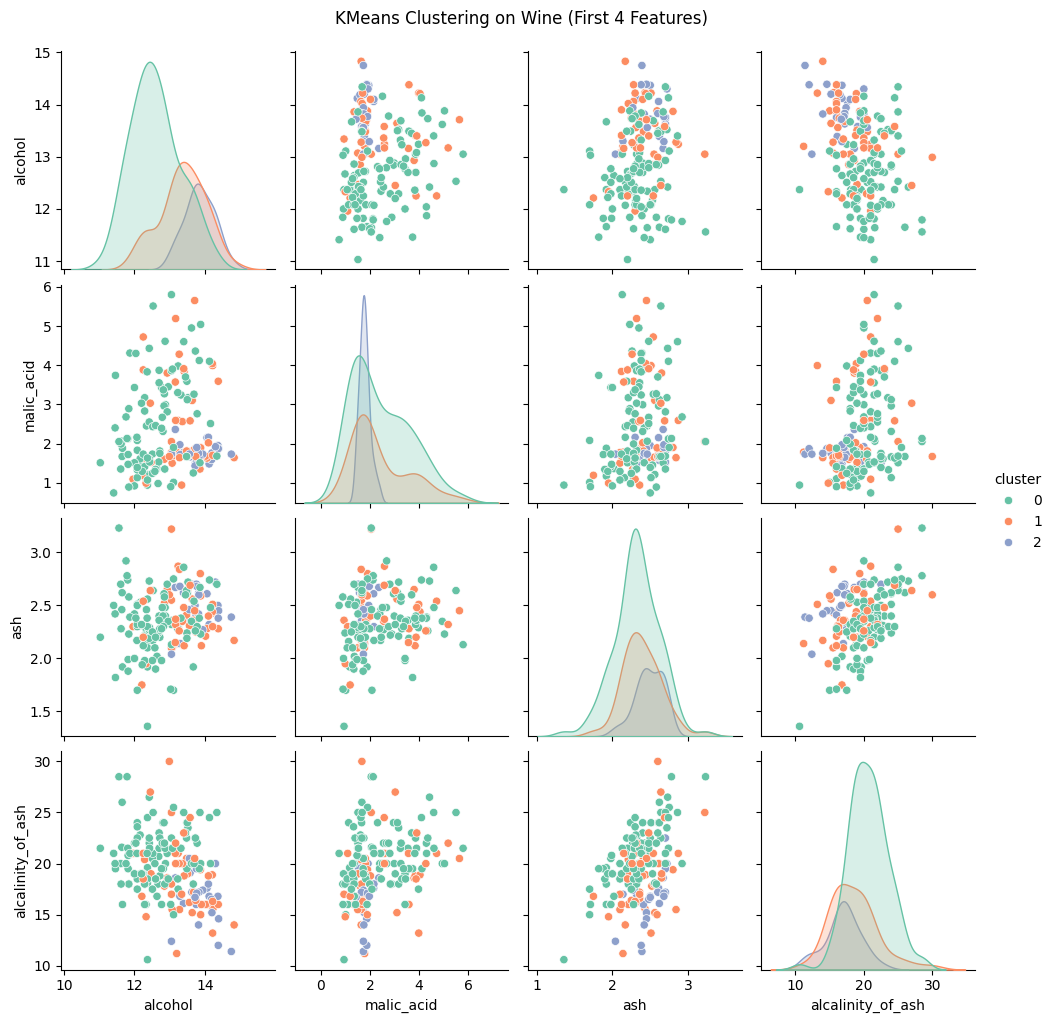

In [26]:
import pandas as pd
import seaborn as sns

data = load_wine()
df = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])
kmeans = KMeans(n_clusters=3, random_state=42).fit(data.data)
df['cluster'] = kmeans.labels_

sns.pairplot(df, hue='cluster', palette='Set2')
plt.suptitle("KMeans Clustering on Wine (First 4 Features)", y=1.02)
plt.show()


47.Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.


In [27]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)
X[:10] += 8  # add some noise
dbscan = DBSCAN(eps=0.9, min_samples=5).fit(X)
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Clusters found:", n_clusters)
print("Noise points:", n_noise)


Clusters found: 3
Noise points: 24


48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

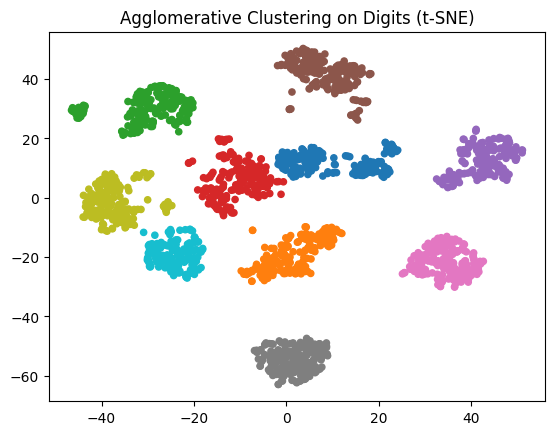

In [28]:
X = load_digits().data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=20)
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()
